<a href="https://colab.research.google.com/github/Jmoralesmo27/g8/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd

path1 = '/content/drive/My Drive/Proyecto DB II/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv'
path2 = '/content/drive/My Drive/Proyecto DB II/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv'

# Cargar los archivos CSV
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

# Combinacion DataFrames
df_combined = pd.concat([df1, df2], ignore_index=True)

# Limpieza de datos
df_combined.dropna(inplace=True)
df_combined.drop_duplicates(inplace=True)

print(df_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1397 non-null   int64  
 1   ActivityDate              1397 non-null   object 
 2   TotalSteps                1397 non-null   int64  
 3   TotalDistance             1397 non-null   float64
 4   TrackerDistance           1397 non-null   float64
 5   LoggedActivitiesDistance  1397 non-null   float64
 6   VeryActiveDistance        1397 non-null   float64
 7   ModeratelyActiveDistance  1397 non-null   float64
 8   LightActiveDistance       1397 non-null   float64
 9   SedentaryActiveDistance   1397 non-null   float64
 10  VeryActiveMinutes         1397 non-null   int64  
 11  FairlyActiveMinutes       1397 non-null   int64  
 12  LightlyActiveMinutes      1397 non-null   int64  
 13  SedentaryMinutes          1397 non-null   int64  
 14  Calories

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_combined['ActivityDate'] = pd.to_datetime(df_combined['ActivityDate'], format='%m/%d/%Y')

# Establecer la fecha
df_combined.set_index('ActivityDate', inplace=True)


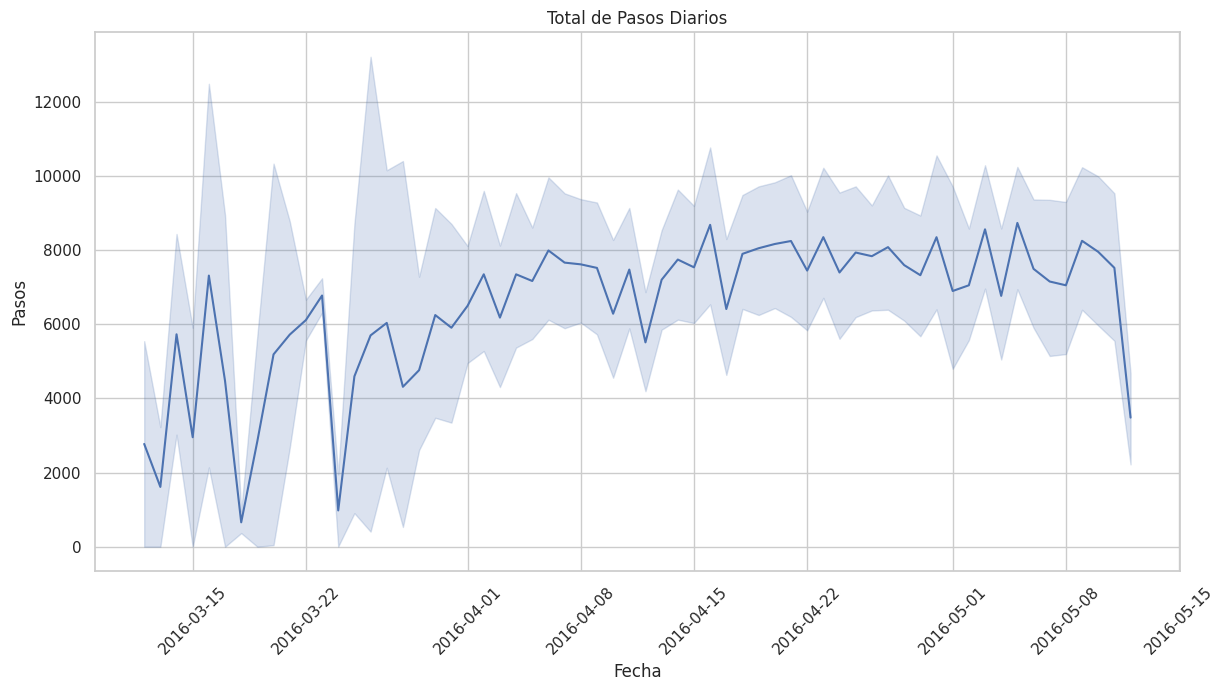

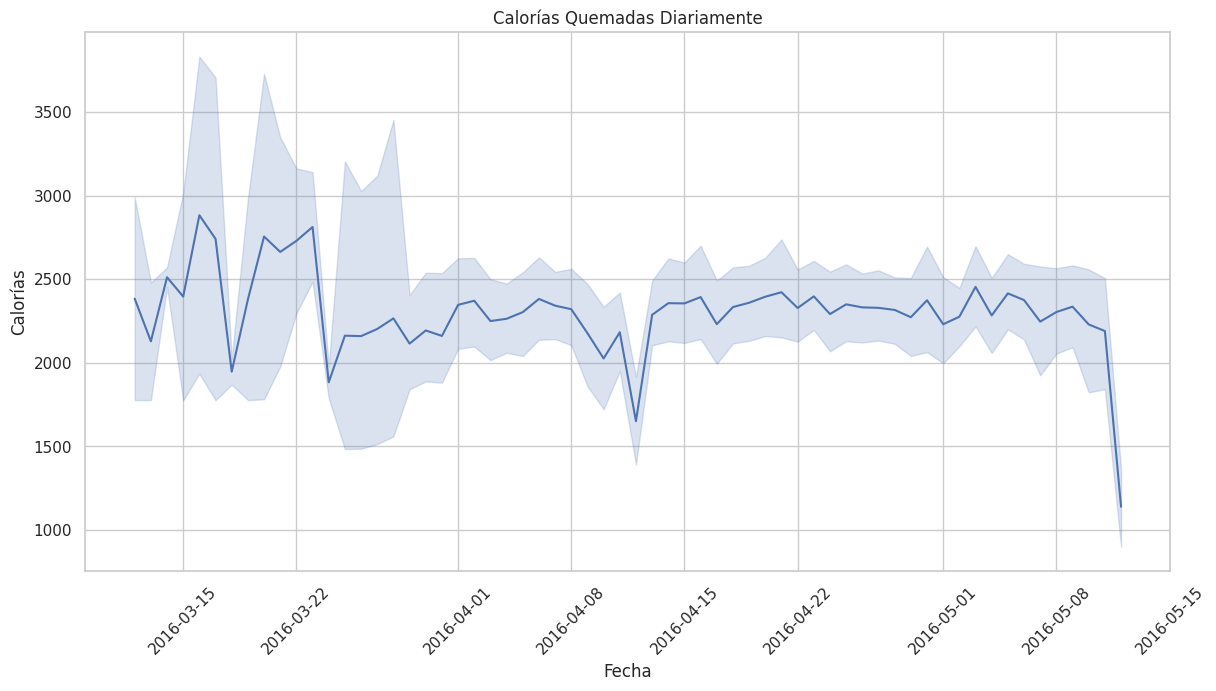

In [17]:
sns.set(style="whitegrid")

# Gráfico de Pasos Diarios
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_combined, x=df_combined.index, y='TotalSteps')
plt.title('Total de Pasos Diarios')
plt.xlabel('Fecha')
plt.ylabel('Pasos')
plt.xticks(rotation=45)
plt.show()

# Gráfico de Calorías Quemadas Diariamente
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_combined, x=df_combined.index, y='Calories')
plt.title('Calorías Quemadas Diariamente')
plt.xlabel('Fecha')
plt.ylabel('Calorías')
plt.xticks(rotation=45)
plt.show()

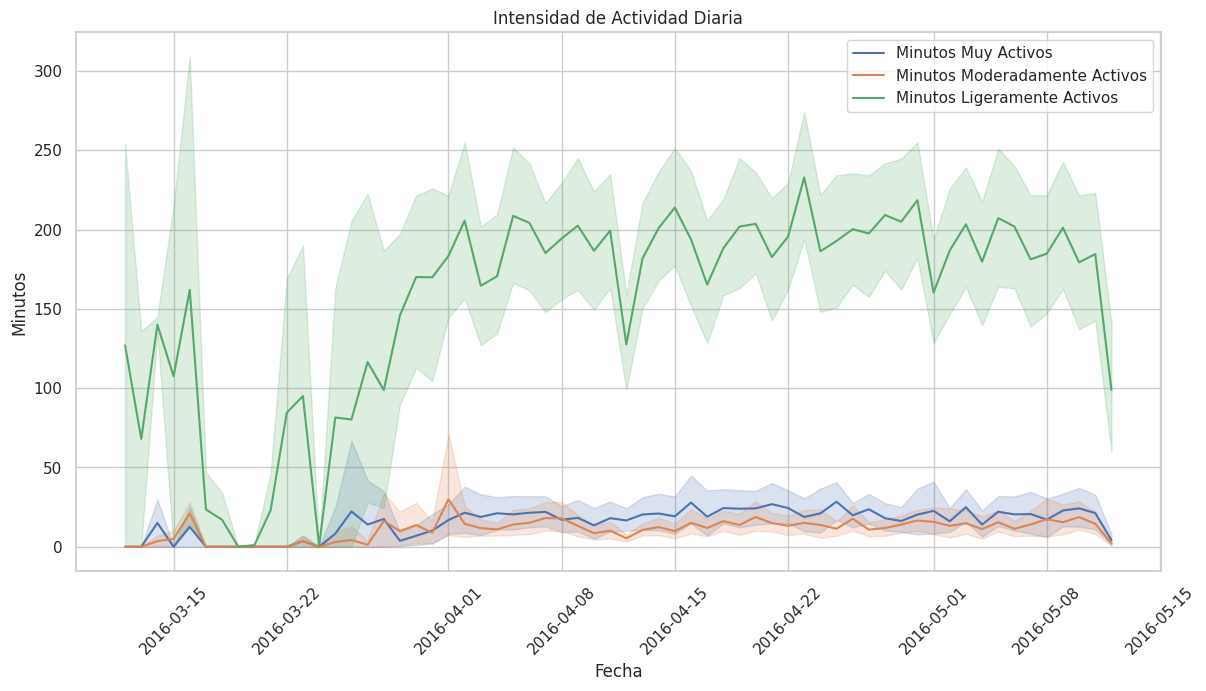

In [18]:
# Gráfico de Intensidades por Día
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_combined, x=df_combined.index, y='VeryActiveMinutes', label='Minutos Muy Activos')
sns.lineplot(data=df_combined, x=df_combined.index, y='FairlyActiveMinutes', label='Minutos Moderadamente Activos')
sns.lineplot(data=df_combined, x=df_combined.index, y='LightlyActiveMinutes', label='Minutos Ligeramente Activos')
plt.title('Intensidad de Actividad Diaria')
plt.xlabel('Fecha')
plt.ylabel('Minutos')
plt.legend()
plt.xticks(rotation=45)
plt.show()

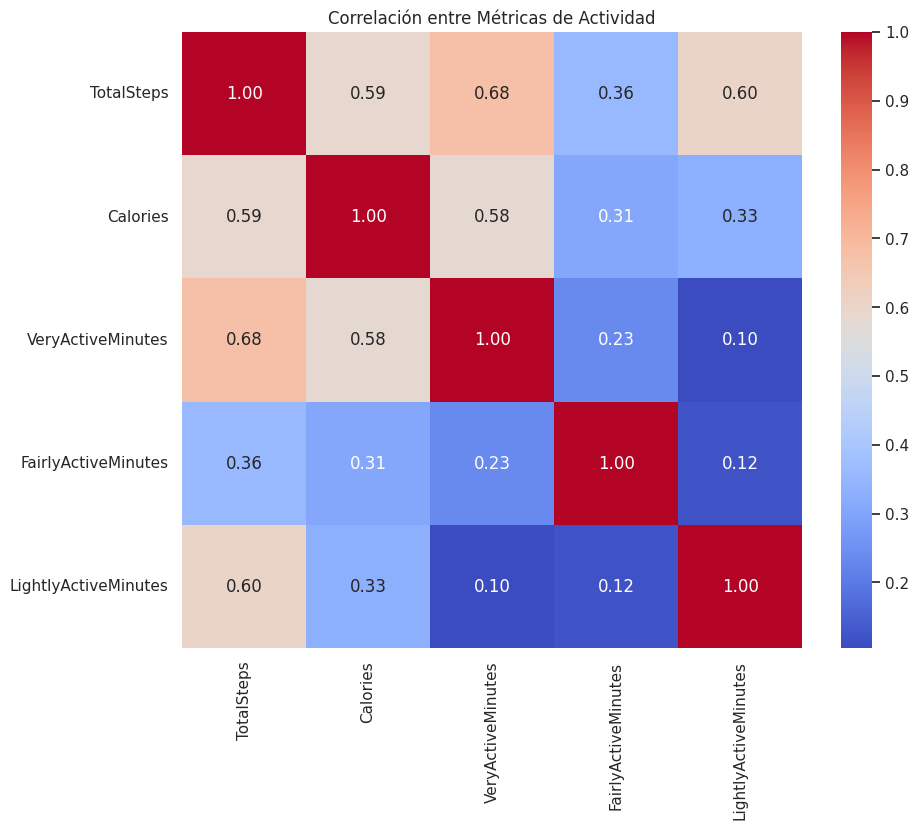

In [19]:
# Mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_combined[['TotalSteps', 'Calories', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Métricas de Actividad')
plt.show()

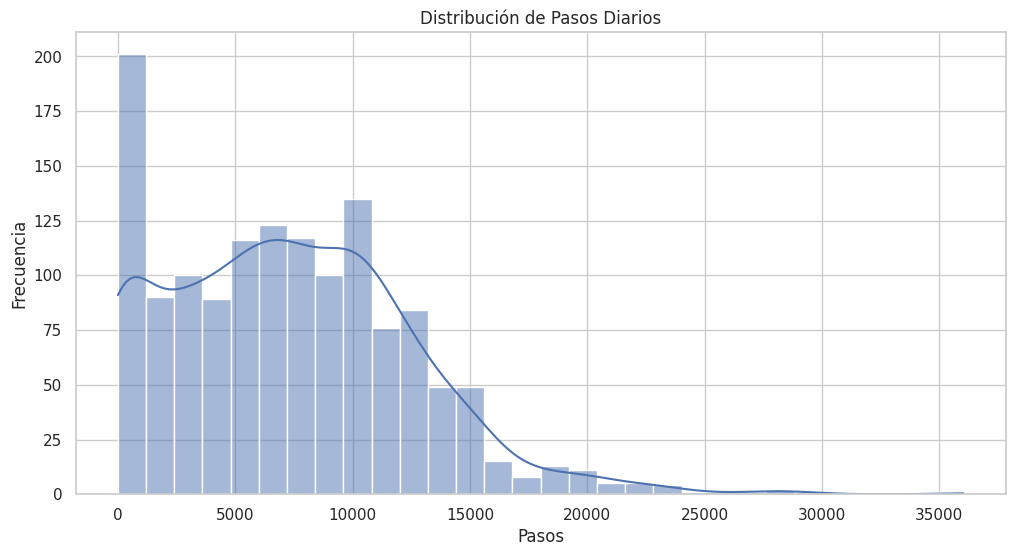

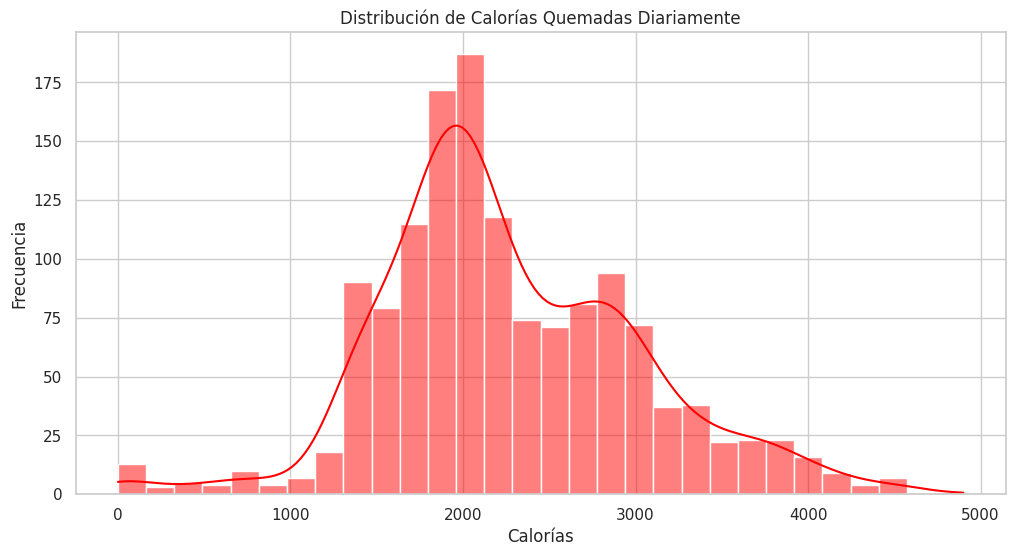

In [20]:
# Histograma de Pasos Diarios
plt.figure(figsize=(12, 6))
sns.histplot(df_combined['TotalSteps'], bins=30, kde=True)
plt.title('Distribución de Pasos Diarios')
plt.xlabel('Pasos')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de Calorías Quemadas
plt.figure(figsize=(12, 6))
sns.histplot(df_combined['Calories'], bins=30, kde=True, color='red')
plt.title('Distribución de Calorías Quemadas Diariamente')
plt.xlabel('Calorías')
plt.ylabel('Frecuencia')
plt.show()


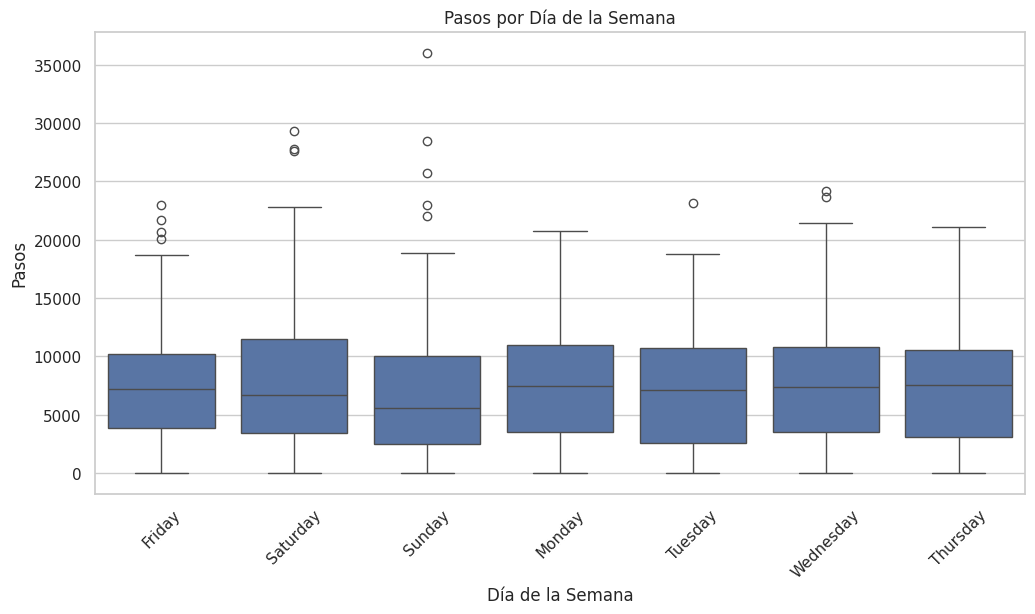

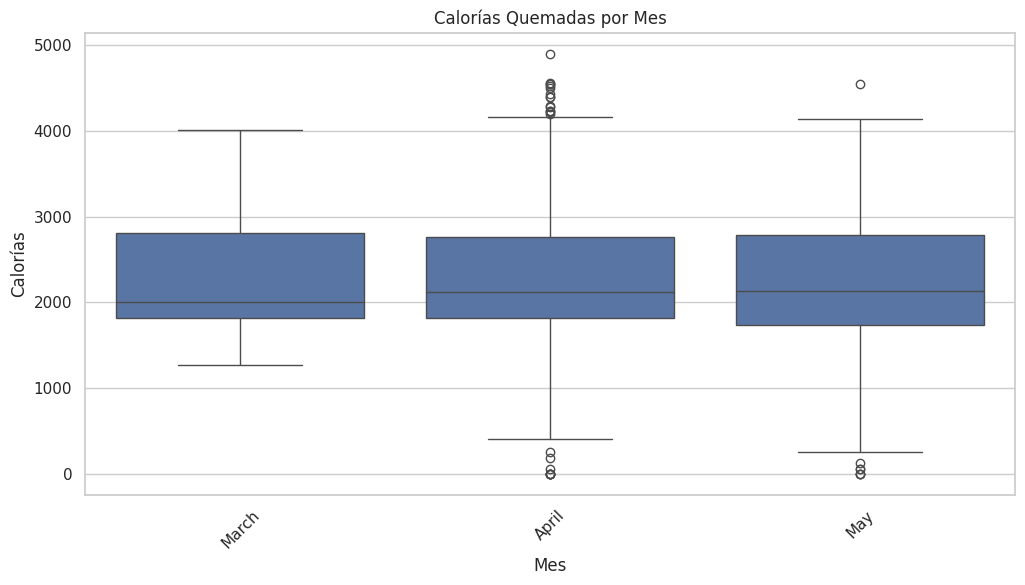

In [21]:
df_combined['DayOfWeek'] = df_combined.index.day_name()
df_combined['Month'] = df_combined.index.month_name()

# Boxplot de Pasos por Día de la Semana
plt.figure(figsize=(12, 6))
sns.boxplot(x='DayOfWeek', y='TotalSteps', data=df_combined)
plt.title('Pasos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Pasos')
plt.xticks(rotation=45)
plt.show()

# Boxplot de Calorías por Mes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Calories', data=df_combined)
plt.title('Calorías Quemadas por Mes')
plt.xlabel('Mes')
plt.ylabel('Calorías')
plt.xticks(rotation=45)
plt.show()

In [24]:
print(df_combined.columns)

Index(['Id', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'DayOfWeek',
       'Month', '7day_MA_Steps'],
      dtype='object')


<ipython-input-26-04f8f271f68d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='TotalSteps', data=df_combined, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


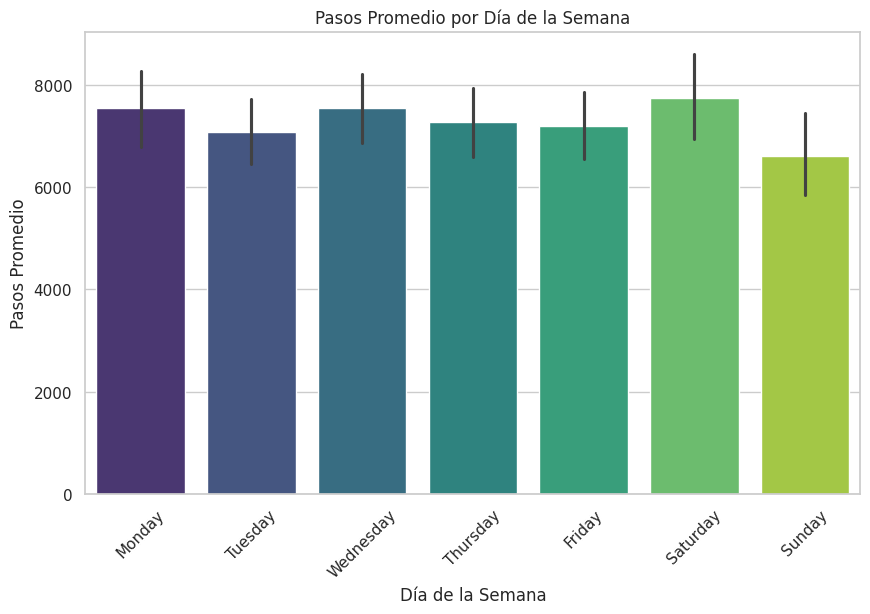

<ipython-input-26-04f8f271f68d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='VeryActiveMinutes', data=df_combined, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='magma')


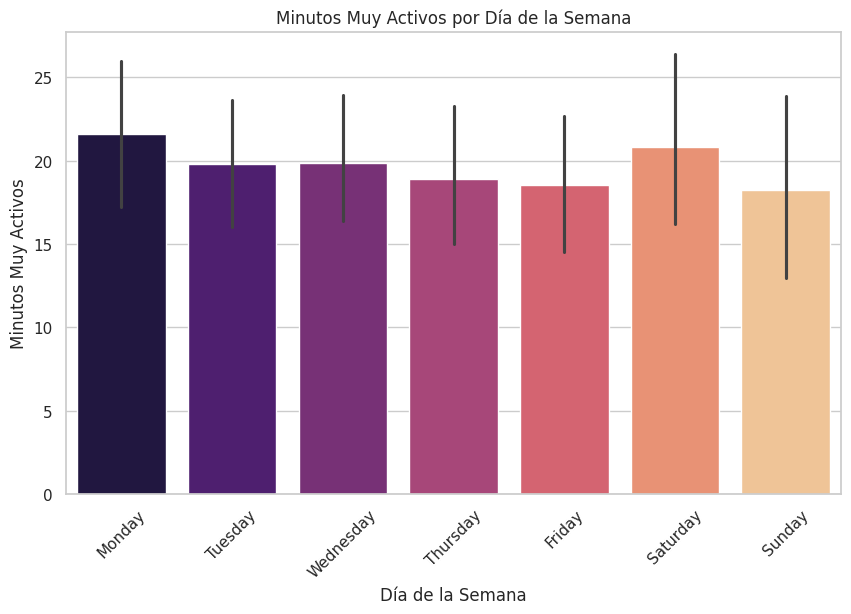

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Gráfico de barras para los pasos promedio por día de la semana
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='TotalSteps', data=df_combined, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Pasos Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Pasos Promedio')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para los minutos activos por día de la semana
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='VeryActiveMinutes', data=df_combined, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='magma')
plt.title('Minutos Muy Activos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Minutos Muy Activos')
plt.xticks(rotation=45)
plt.show()

In [29]:
print(df_combined.columns)
print(df_combined.index)

Index(['Id', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'DayOfWeek',
       'Month', '7day_MA_Steps'],
      dtype='object')
DatetimeIndex(['2016-03-25', '2016-03-26', '2016-03-27', '2016-03-28',
               '2016-03-29', '2016-03-30', '2016-03-31', '2016-04-01',
               '2016-04-02', '2016-04-03',
               ...
               '2016-05-03', '2016-05-04', '2016-05-05', '2016-05-06',
               '2016-05-07', '2016-05-08', '2016-05-09', '2016-05-10',
               '2016-05-11', '2016-05-12'],
              dtype='datetime64[ns]', name='ActivityDate', length=1397, freq=None)


In [34]:
!pip install dash
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 16.8 MB/s eta 0:00:00


In [41]:
import dash
from dash import html, dcc
import plotly.express as px
import pandas as pd

# Asumiendo que df_combined es tu DataFrame y ya tiene la fecha como índice
# Agregar una columna de semana para la agrupación si aún no existe
if 'Week' not in df_combined.columns:
    df_combined['Week'] = df_combined.index.isocalendar().week

# Seleccionar solo columnas numéricas para asegurar que no se incluyen datos de tipo objeto
numeric_columns = df_combined.select_dtypes(include=[np.number]).columns.tolist()

# Agrupar por semana y calcular el promedio solo de las columnas numéricas
df_weekly = df_combined[numeric_columns].groupby('Week').mean()

# Crear figuras de Plotly Express
fig_daily = px.line(df_combined.reset_index(), x='ActivityDate', y='TotalSteps', title='Actividad Diaria de Pasos')
fig_weekly = px.line(df_weekly.reset_index(), x='Week', y='TotalSteps', title='Actividad Semanal de Pasos', markers=True)

# Iniciar la aplicación Dash
app = dash.Dash(__name__)

# Configurar el layout del dashboard
app.layout = html.Div([
    html.H1("Dashboard Interactivo de TechFit"),
    dcc.Tabs([
        dcc.Tab(label='Vista Diaria', children=[
            dcc.Graph(
                id='daily-graph',
                figure=fig_daily
            )
        ]),
        dcc.Tab(label='Vista Semanal', children=[
            dcc.Graph(
                id='weekly-graph',
                figure=fig_weekly
            )
        ])
    ])
])

# Correr el servidor
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [45]:
import dash
from dash import html, dcc
import plotly.express as px
import pandas as pd
import numpy as np

# Asumiendo que 'df_combined' es tu DataFrame y ya tiene la fecha correctamente como índice.

# Seleccionamos solo columnas numéricas para evitar errores
numeric_df = df_combined.select_dtypes(include=[np.number])

# Resample y cálculo del promedio diario y semanal solo de columnas numéricas
df_daily = numeric_df.resample('D').mean()
df_weekly = numeric_df.resample('W').mean()

# Crear figuras para el dashboard
fig_daily_steps = px.line(df_daily, y='TotalSteps', title='Pasos Diarios Promedio', labels={'value': 'Pasos', 'index': 'Fecha'})
fig_daily_calories = px.line(df_daily, y='Calories', title='Calorías Diarias Promedio', labels={'value': 'Calorías', 'index': 'Fecha'})
fig_weekly_activity = px.line(df_weekly, y=['VeryActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes'],
                              title='Minutos de Actividad Semanal Promedio',
                              labels={'value': 'Minutos', 'index': 'Semana'},
                              markers=True,
                              color_discrete_map={
                                  'VeryActiveMinutes': 'red',
                                  'LightlyActiveMinutes': 'orange',
                                  'SedentaryMinutes': 'blue'
                              })

# Iniciar la aplicación Dash
app = dash.Dash(__name__)

# Configurar el layout del dashboard
app.layout = html.Div([
    html.H1("Dashboard de Actividad Física de TechFit"),
    dcc.Tabs(id="tabs", children=[
        dcc.Tab(label='Pasos Diarios', children=[
            dcc.Graph(
                id='daily-graph',
                figure=fig_daily_steps
            )
        ]),
        dcc.Tab(label='Calorías Diarias', children=[
            dcc.Graph(
                id='daily-calories-graph',
                figure=fig_daily_calories
            )
        ]),
        dcc.Tab(label='Actividad Semanal', children=[
            dcc.Graph(
                id='weekly-activity-graph',
                figure=fig_weekly_activity
            )
        ])
    ])
])

# Correr el servidor
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [43]:
pip install dash plotly

In [44]:
import dash
from dash import html, dcc
import plotly.express as px
import pandas as pd
import numpy as np

# Suponiendo que df_combined es tu DataFrame y ya tiene las fechas correctas como índice
# Ejemplo de cómo crear una nueva columna de mes y año para agrupaciones
df_combined['Month'] = df_combined.index.month
df_combined['Year'] = df_combined.index.year

# Crear una figura para minutos activos por categoría
fig_activity = px.line(df_combined, x=df_combined.index, y=['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes'], labels={'value': 'Minutes', 'variable': 'Activity Type'}, title='Minutes of Activity Over Time')

# Mejorar el estilo del gráfico
fig_activity.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',  # Fondo transparente
    'paper_bgcolor': 'rgba(0,0,0,0)', # Fondo transparente
})

# Iniciar la aplicación Dash
app = dash.Dash(__name__)

# Configurar el layout del dashboard
app.layout = html.Div([
    html.H1("TechFit Activity Dashboard", style={'textAlign': 'center'}),
    dcc.Graph(
        id='activity-types-graph',
        figure=fig_activity
    ),
    html.Div([
        html.Label("Select Year:"),
        dcc.Dropdown(
            id='year-selector',
            options=[{'label': year, 'value': year} for year in sorted(df_combined['Year'].unique())],
            value=df_combined['Year'].max()  # Default to most recent year
        ),
    ], style={'width': '300px', 'margin': 'auto'}),
    html.Div(id='output-container')
])

# Callback para actualizar gráficos basado en el año seleccionado
@app.callback(
    dash.dependencies.Output('activity-types-graph', 'figure'),
    [dash.dependencies.Input('year-selector', 'value')]
)
def update_graph(selected_year):
    filtered_df = df_combined[df_combined['Year'] == selected_year]
    updated_fig = px.line(filtered_df, x=filtered_df.index, y=['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes'], labels={'value': 'Minutes', 'variable': 'Activity Type'}, title=f'Activity Minutes in {selected_year}')
    return updated_fig

# Correr el servidor
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>